# Artificial Neural Networks



In [ ]:
import numpy as np

inputs = np.array([0.6, 0.2, 0.1])
weights = np.array([0.4, 0.7, 0.2])
bias = 0.5

# n = w·x + b
n = np.dot(inputs, weights) + bias

# ReLU activation function
def relu(x):
    return np.maximum(0, x)

output = relu(n)

print("Z:", n)
print("ReLU output:", output)

Z: 0.9
ReLU output: 0.9


# Data Representation

## Image Representation

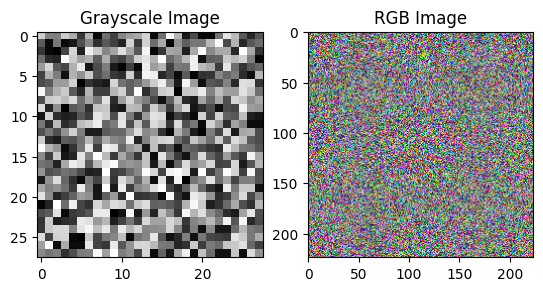

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Grayscale 28x28 random image
gray_image = np.random.randint(0, 256, (28, 28), dtype=np.uint8)

# RGB 224x224 image
rgb_image = np.random.randint(0, 256, (224, 224, 3), dtype=np.uint8)

plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title("Grayscale Image")

plt.subplot(1, 2, 2)
plt.imshow(rgb_image)
plt.title("RGB Image")

plt.show()

## Text Representation

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

texts = ["king and queen", "the queen is in the palace", "the king went to war"]

tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

padded = pad_sequences(sequences)
print("Tokenized and Padded Sentences:\n", padded)
print("Word Indexes:\n", tokenizer.word_index)

Tokenized and Padded Sentences:
 [[ 0  0  0  2  4  3]
 [ 1  3  5  6  1  7]
 [ 0  1  2  8  9 10]]
Word Indexes:
 {'the': 1, 'king': 2, 'queen': 3, 'and': 4, 'is': 5, 'in': 6, 'palace': 7, 'went': 8, 'to': 9, 'war': 10}


## Label Representation

In [ ]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

labels = ['cat', 'dog', 'cat', 'bird']
le = LabelEncoder()
encoded = le.fit_transform(labels)
print("Label Encoding:", encoded)

# One-hot
one_hot = to_categorical(encoded)
print("One-Hot Encoding:\n", one_hot)

Label Encoding: [1 2 1 0]
One-Hot Encoding:
 [[0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]


# Normalization and Standardization

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

data = np.array([[150, 50],
                 [160, 60],
                 [170, 70],
                 [180, 80],
                 [190, 90]])

df = pd.DataFrame(data, columns=['Height', 'Weight'])
print("Original data:\n", df)

# Min-Max Normalization
scaler_minmax = MinMaxScaler()
data_norm = scaler_minmax.fit_transform(data)
df_norm = pd.DataFrame(data_norm, columns=['Height', 'Weight'])
print("\nMin-Max Normalization:\n", df_norm)

# Z-score Standardization
scaler_std = StandardScaler()
data_std = scaler_std.fit_transform(data)
df_std = pd.DataFrame(data_std, columns=['Height', 'Weight'])
print("\nZ-score Standardization:\n", df_std)


Original data:
    Height  Weight
0     150      50
1     160      60
2     170      70
3     180      80
4     190      90

Min-Max Normalization:
    Height  Weight
0    0.00    0.00
1    0.25    0.25
2    0.50    0.50
3    0.75    0.75
4    1.00    1.00

Z-score Standardization:
      Height    Weight
0 -1.414214 -1.414214
1 -0.707107 -0.707107
2  0.000000  0.000000
3  0.707107  0.707107
4  1.414214  1.414214


# Activation Functions

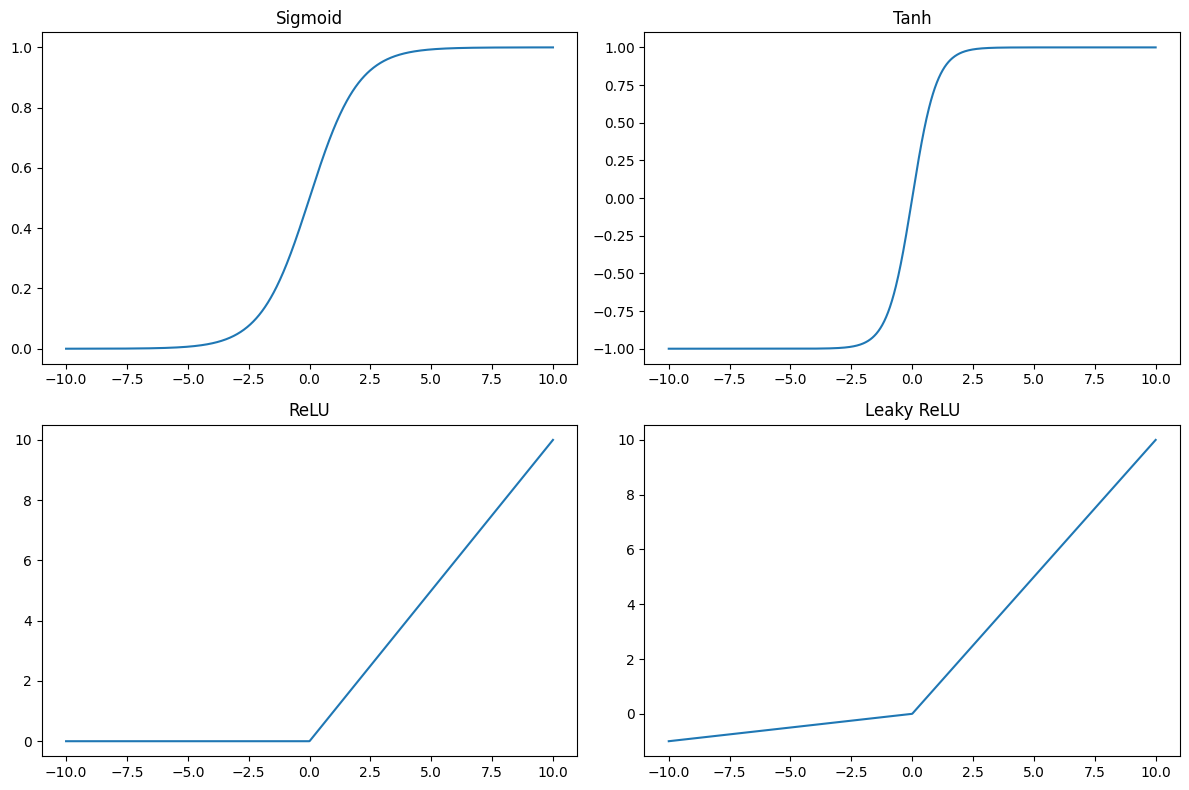

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-10, 10, 1000)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(0, x)

def leaky_relu(x, alpha=0.1):
    return np.where(x > 0, x, alpha * x)

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(x, sigmoid(x))
plt.title("Sigmoid")

plt.subplot(2, 2, 2)
plt.plot(x, tanh(x))
plt.title("Tanh")

plt.subplot(2, 2, 3)
plt.plot(x, relu(x))
plt.title("ReLU")

plt.subplot(2, 2, 4)
plt.plot(x, leaky_relu(x))
plt.title("Leaky ReLU")

plt.tight_layout()
plt.show()

# Loss Functions

In [ ]:
from tensorflow.keras.losses import BinaryCrossentropy, CategoricalCrossentropy, MeanSquaredError

# ---- 1. Binary Cross-Entropy ----
# Binary classification: 0 = cat, 1 = dog
y_true_binary = [0, 1, 1, 0]         # real tags
y_pred_binary = [0.1, 0.9, 0.8, 0.2] # probabilities predicted by the model

bce = BinaryCrossentropy()
print("Binary Cross-Entropy:", bce(y_true_binary, y_pred_binary).numpy())


# ---- 2. Categorical Cross-Entropy ----
# Multi-class classification: 3 classes (cat, dog, bird)
y_true_categorical = [[1,0,0], [0,1,0], [0,0,1]]  # One-hot real tags
y_pred_categorical = [[0.7,0.2,0.1], [0.1,0.8,0.1], [0.2,0.2,0.6]]  # predictions

cce = CategoricalCrossentropy()
print("Categorical Cross-Entropy:", cce(y_true_categorical, y_pred_categorical).numpy())


# ---- 3. MSE (Mean Squared Error) ----
# Regression problem: e.g. temperature prediction
y_true_reg = [30.0, 25.0, 20.0]     # actual temperatures
y_pred_reg = [28.0, 27.0, 18.0]     # predicted temperatures

mse = MeanSquaredError()
print("Mean Squared Error:", mse(y_true_reg, y_pred_reg).numpy())


Binary Cross-Entropy: 0.16425204
Categorical Cross-Entropy: 0.36354804
Mean Squared Error: 4.0


# Optimization

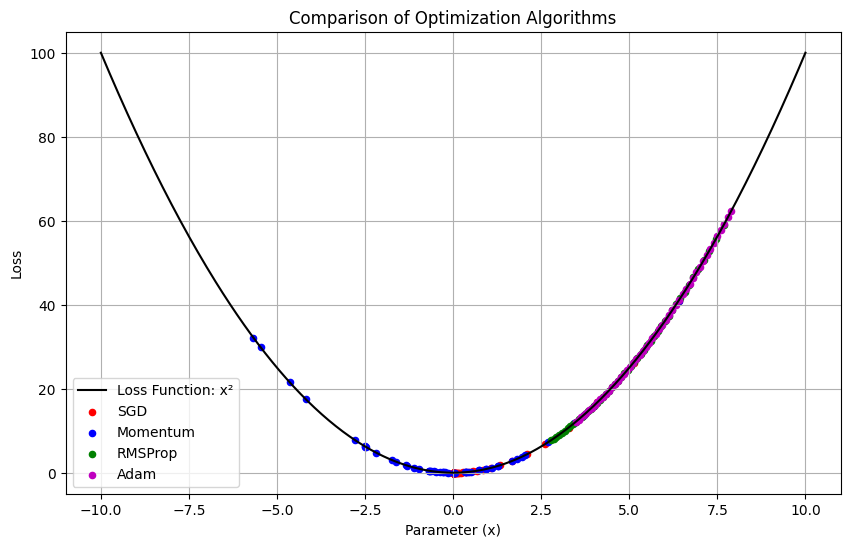

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- Loss Function and Gradient ---
def loss_function(parameter: float) -> float:
    """Quadratic loss function: f(x) = x^2"""
    return parameter ** 2

def compute_gradient(parameter: float) -> float:
    """Derivative of the loss function"""
    return 2 * parameter

# --- Optimization Algorithms ---
def sgd(initial_param: float, learning_rate: float, iterations: int) -> list[float]:
    """Stochastic Gradient Descent"""
    param = initial_param
    trajectory = []
    for _ in range(iterations):
        gradient = compute_gradient(param)
        param -= learning_rate * gradient
        trajectory.append(param)
    return trajectory

def momentum(initial_param: float, learning_rate: float, iterations: int, momentum_rate: float = 0.9) -> list[float]:
    """Momentum optimizer"""
    param = initial_param
    velocity = 0.0
    trajectory = []
    for _ in range(iterations):
        gradient = compute_gradient(param)
        velocity = momentum_rate * velocity + learning_rate * gradient
        param -= velocity
        trajectory.append(param)
    return trajectory

def rmsprop(initial_param: float, learning_rate: float, iterations: int, beta: float = 0.9, epsilon: float = 1e-8) -> list[float]:
    """RMSProp optimizer"""
    param = initial_param
    squared_grad_avg = 0.0
    trajectory = []
    for _ in range(iterations):
        gradient = compute_gradient(param)
        squared_grad_avg = beta * squared_grad_avg + (1 - beta) * gradient ** 2
        param -= learning_rate * gradient / (np.sqrt(squared_grad_avg) + epsilon)
        trajectory.append(param)
    return trajectory

def adam(initial_param: float, learning_rate: float, iterations: int,
         beta1: float = 0.9, beta2: float = 0.999, epsilon: float = 1e-8) -> list[float]:
    """Adam optimizer"""
    param = initial_param
    first_moment, second_moment = 0.0, 0.0
    trajectory = []

    for t in range(1, iterations + 1):
        gradient = compute_gradient(param)
        first_moment = beta1 * first_moment + (1 - beta1) * gradient
        second_moment = beta2 * second_moment + (1 - beta2) * gradient ** 2

        corrected_first = first_moment / (1 - beta1 ** t)
        corrected_second = second_moment / (1 - beta2 ** t)

        param -= learning_rate * corrected_first / (np.sqrt(corrected_second) + epsilon)
        trajectory.append(param)

    return trajectory

# --- Experiment Setup ---
initial_parameter = 8.0
learning_rate = 0.1
iterations = 50

# Run optimizations
trajectory_sgd = sgd(initial_parameter, learning_rate, iterations)
trajectory_momentum = momentum(initial_parameter, learning_rate, iterations)
trajectory_rmsprop = rmsprop(initial_parameter, learning_rate, iterations)
trajectory_adam = adam(initial_parameter, learning_rate, iterations)


# --- Visualization ---
x_values = np.linspace(-10, 10, 400)
y_values = loss_function(x_values)

plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, 'k-', label="Loss Function: x²")

plt.scatter(trajectory_sgd, [loss_function(x) for x in trajectory_sgd], c='r', s=20, label="SGD")
plt.scatter(trajectory_momentum, [loss_function(x) for x in trajectory_momentum], c='b', s=20, label="Momentum")
plt.scatter(trajectory_rmsprop, [loss_function(x) for x in trajectory_rmsprop], c='g', s=20, label="RMSProp")
plt.scatter(trajectory_adam, [loss_function(x) for x in trajectory_adam], c='m', s=20, label="Adam")

plt.title("Comparison of Optimization Algorithms")
plt.xlabel("Parameter (x)")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()
plt.show()


# Hyperparameter Effect

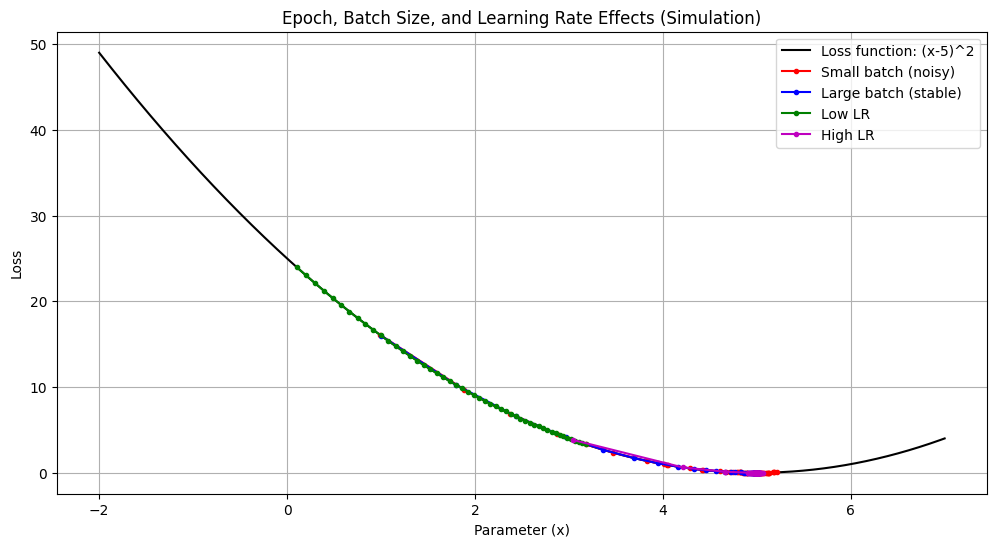

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- Loss function ---
def loss_function(x):
    return (x - 5)**2

def compute_gradient(x):
    return 2 * (x - 5)

# --- SGD with batch size simulation ---
def simulate_sgd(initial_param, learning_rate, iterations, noise_level=0.0):
    param = initial_param
    trajectory = []
    for _ in range(iterations):
        gradient = compute_gradient(param)
        # batch size effect: smaller batch = noisier gradient
        gradient += np.random.randn() * noise_level
        param -= learning_rate * gradient
        trajectory.append(param)
    return trajectory

# --- Simulation Parameters ---
initial_parameter = 0.0
iterations = 50

# Effect of different batch size: smaller batch -> louder
trajectory_small_batch = simulate_sgd(initial_parameter, learning_rate=0.1, iterations=iterations, noise_level=1.0)
trajectory_large_batch = simulate_sgd(initial_parameter, learning_rate=0.1, iterations=iterations, noise_level=0.1)

# Different learning rate effect
trajectory_lr_small = simulate_sgd(initial_parameter, learning_rate=0.01, iterations=iterations, noise_level=0.1)
trajectory_lr_large = simulate_sgd(initial_parameter, learning_rate=0.3, iterations=iterations, noise_level=0.1)

# --- Visualization ---
x_vals = np.linspace(-2, 7, 400)
y_vals = loss_function(x_vals)

plt.figure(figsize=(12, 6))
plt.plot(x_vals, y_vals, 'k-', label="Loss function: (x-5)^2")

# Batch size effect
plt.plot(trajectory_small_batch, [loss_function(x) for x in trajectory_small_batch], 'r.-', label="Small batch (noisy)")
plt.plot(trajectory_large_batch, [loss_function(x) for x in trajectory_large_batch], 'b.-', label="Large batch (stable)")

# Learning rate effect
plt.plot(trajectory_lr_small, [loss_function(x) for x in trajectory_lr_small], 'g.-', label="Low LR")
plt.plot(trajectory_lr_large, [loss_function(x) for x in trajectory_lr_large], 'm.-', label="High LR")

plt.xlabel("Parameter (x)")
plt.ylabel("Loss")
plt.title("Epoch, Batch Size, and Learning Rate Effects (Simulation)")
plt.legend()
plt.grid(True)
plt.show()

# Flat + Dense

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

# A single 28x28 grayscale image (random numbers)
sample_image = np.random.rand(1, 28, 28)  # shape: (batch_size=1, 28, 28)

model = Sequential([
    Flatten(input_shape=(28, 28)),   # Converts a 28x28 image to a one-dimensional 784 neuron
    Dense(64, activation='relu'),    # Dense layer with 64 neurons
    Dense(10, activation='softmax')  # 10-class output (e.g. digit classification)
])

model.summary()

output = model(sample_image)
print("Çıktı boyutu:", output.shape)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,890 (198.79 KB)

 Trainable params: 50,890 (198.79 KB)

 Non-trainable params: 0 (0.00 B)

Çıktı boyutu: (1, 10)


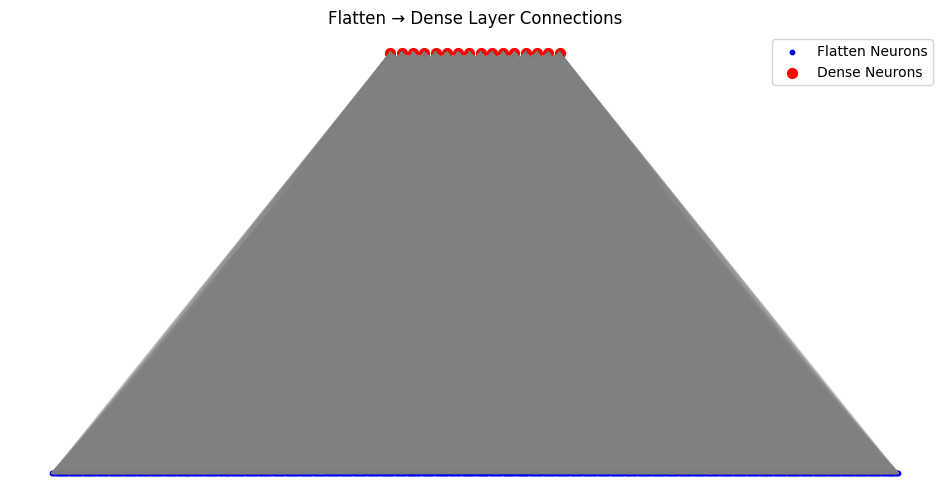

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

input_shape = (28, 28)   # 28x28 input image
flatten_size = input_shape[0] * input_shape[1]
dense_neurons = 16       # Dense layer with 16 neurons for visualization

# Flatten input neurons (one neuron per pixel)
x_flat = np.linspace(0, 1, flatten_size)
y_flat = np.zeros(flatten_size)

# Dense layer neurons
x_dense = np.linspace(0.4, 0.6, dense_neurons)
y_dense = np.ones(dense_neurons)

plt.figure(figsize=(12, 6))
for i in range(flatten_size):
    for j in range(dense_neurons):
        plt.plot([x_flat[i], x_dense[j]], [y_flat[i], y_dense[j]], color='gray', alpha=0.3)

plt.scatter(x_flat, y_flat, s=10, c='blue', label='Flatten Neurons')
plt.scatter(x_dense, y_dense, s=50, c='red', label='Dense Neurons')

plt.title("Flatten → Dense Layer Connections")
plt.axis('off')
plt.legend()
plt.show()


# CNN Example

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# A single 28x28 grayscale image (random numbers)
sample_image = np.random.rand(1, 28, 28, 1)  # shape: (batch_size=1, 28, 28, 1 channel)

model = Sequential([
    Conv2D(filters=8, kernel_size=(3,3), activation='relu', input_shape=(28,28,1), name="Conv2D_1"),
    MaxPooling2D(pool_size=(2,2), name="MaxPool_1"),
    Conv2D(filters=16, kernel_size=(3,3), activation='relu', name="Conv2D_2"),
    MaxPooling2D(pool_size=(2,2), name="MaxPool_2"),
    Flatten(name="Flatten"),
    Dense(32, activation='relu', name="Dense_1"),
    Dense(10, activation='softmax', name="Output")  # 10 class examples
])

model.summary()

output = model(sample_image)
print("Çıktı boyutu:", output.shape)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Conv2D_1 (Conv2D)               │ (None, 26, 26, 8)      │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MaxPool_1 (MaxPooling2D)        │ (None, 13, 13, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv2D_2 (Conv2D)               │ (None, 11, 11, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MaxPool_2 (MaxPooling2D)        │ (None, 5, 5, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Flatten (Flatten)               │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_1 (Dense)                 │ (None, 32)             │        12,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,410 (56.29 KB)

 Trainable params: 14,410 (56.29 KB)

 Non-trainable params: 0 (0.00 B)

Çıktı boyutu: (1, 10)


In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import TimeDistributed, Conv2D, MaxPooling2D, Flatten, LSTM, Dense

# 10 video samples, 5 frames/video, 28x28 grayscale
X = np.random.rand(10, 5, 28, 28, 1)  # shape: (num_samples, timesteps, height, width, channels)
y = np.random.randint(0, 2, 10)       # binary label (e.g.: movement / no movement)

model = Sequential()

# process each frame with Conv2D using TimeDistributed
model.add(TimeDistributed(Conv2D(8, (3,3), activation='relu'), input_shape=(5,28,28,1)))
model.add(TimeDistributed(MaxPooling2D((2,2))))
model.add(TimeDistributed(Flatten()))

# Learn the dependency between frames with LSTM
model.add(LSTM(16, activation='tanh'))

model.add(Dense(1, activation='sigmoid'))

model.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ time_distributed_3              │ (None, 5, 26, 26, 8)   │            80 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_4              │ (None, 5, 13, 13, 8)   │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_5              │ (None, 5, 1352)        │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 16)             │        87,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 87,713 (342.63 KB)

 Trainable params: 87,713 (342.63 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

# 100 samples, 28x28 grayscale, 1 channel
X_train = np.random.rand(100, 28, 28, 1)
y_train = np.random.randint(0, 10, 100)  # Label for 10 classes

model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))  # 25% neuron shutdown

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # 50% neuron shutdown

model.add(Dense(10, activation='softmax'))

model.summary()


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 11, 11, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,418 (880.54 KB)

 Trainable params: 225,226 (879.79 KB)

 Non-trainable params: 192 (768.00 B)

## Underfitting

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # normalize

# Very simple model (for underfitting)
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8104 - loss: 0.7174 - val_accuracy: 0.9172 - val_loss: 0.3066
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9145 - loss: 0.3085 - val_accuracy: 0.9204 - val_loss: 0.2866
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9191 - loss: 0.2889 - val_accuracy: 0.9234 - val_loss: 0.2750
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9229 - loss: 0.2765 - val_accuracy: 0.9249 - val_loss: 0.2711
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9272 - loss: 0.2637 - val_accuracy: 0.9263 - val_loss: 0.2700


## Overfitting

In [ ]:
# Very complex model (will overfit)
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=30, validation_data=(x_test, y_test))


Epoch 1/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 17ms/step - accuracy: 0.9041 - loss: 0.3172 - val_accuracy: 0.9685 - val_loss: 0.1054
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 19ms/step - accuracy: 0.9717 - loss: 0.0924 - val_accuracy: 0.9731 - val_loss: 0.0952
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 18ms/step - accuracy: 0.9801 - loss: 0.0634 - val_accuracy: 0.9721 - val_loss: 0.1003
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 19ms/step - accuracy: 0.9843 - loss: 0.0504 - val_accuracy: 0.9805 - val_loss: 0.0731
Epoch 5/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 18ms/step - accuracy: 0.9883 - loss: 0.0377 - val_accuracy: 0.9768 - val_loss: 0.0818
Epoch 6/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.9898 - loss: 0.0324 - val_accuracy: 0.9728 - val_loss: 0.1088
Epoch 7/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 17ms/step - accuracy: 0.9906 - loss: 0.0310 - val_accuracy: 0.9752 - val_loss: 0.1172
Epoch 8/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 18ms/step - accuracy: 0.9926 -

## Balanced Model + Regularization

In [ ]:
# More balanced model (dropout + L2 regularization + early stopping)
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Early stopping callback
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(x_train, y_train, epochs=30,
                    validation_data=(x_test, y_test),
                    callbacks=[early_stop])


Epoch 1/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.8120 - loss: 0.7866 - val_accuracy: 0.9524 - val_loss: 0.2891
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9297 - loss: 0.3685 - val_accuracy: 0.9591 - val_loss: 0.2618
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 10ms/step - accuracy: 0.9353 - loss: 0.3473 - val_accuracy: 0.9656 - val_loss: 0.2415
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.9375 - loss: 0.3281 - val_accuracy: 0.9678 - val_loss: 0.2334
Epoch 5/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9421 - loss: 0.3184 - val_accuracy: 0.9662 - val_loss: 0.2389
Epoch 6/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.9404 - loss: 0.3241 - val_accuracy: 0.9692 - val_loss: 0.2336
Epoch 7/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9428 - loss: 0.3165 - val_accuracy: 0.9722 - val_loss: 0.2172
Epoch 8/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.9442 - loss: 

## Examples with Graph

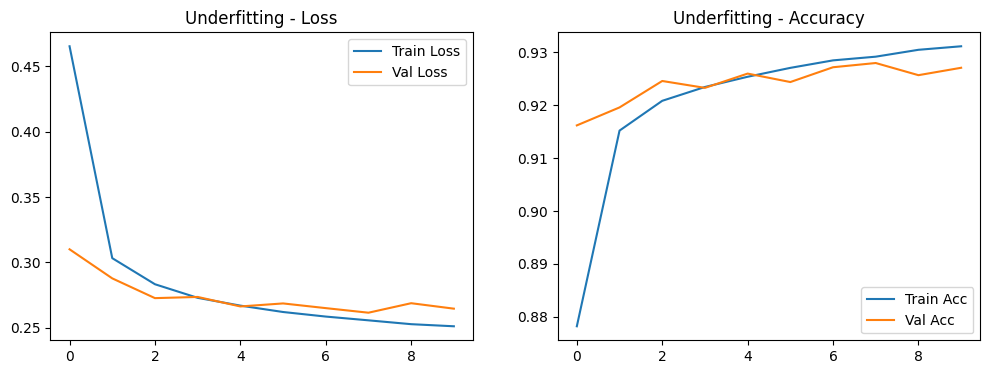

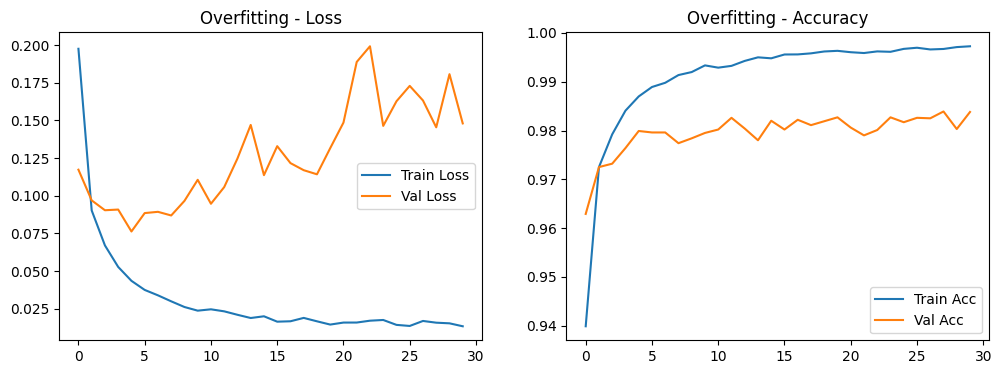

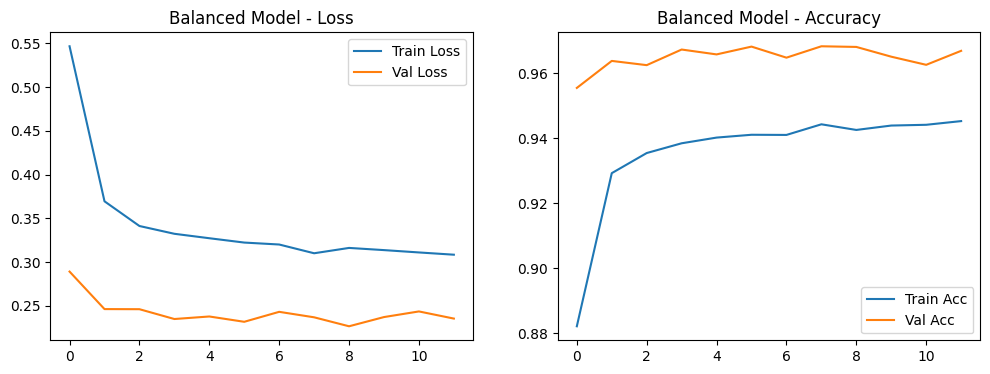

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# 1. Dataset: MNIST
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

def train_and_plot(model, title, epochs=20):
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(x_train, y_train,
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        verbose=0)

    fig, axs = plt.subplots(1, 2, figsize=(12, 4))

    # Loss
    axs[0].plot(history.history['loss'], label='Train Loss')
    axs[0].plot(history.history['val_loss'], label='Val Loss')
    axs[0].set_title(f'{title} - Loss')
    axs[0].legend()

    # Accuracy
    axs[1].plot(history.history['accuracy'], label='Train Acc')
    axs[1].plot(history.history['val_accuracy'], label='Val Acc')
    axs[1].set_title(f'{title} - Accuracy')
    axs[1].legend()

    plt.show()

underfit_model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(10, activation='softmax')
])
train_and_plot(underfit_model, "Underfitting", epochs=10)

overfit_model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax')
])
train_and_plot(overfit_model, "Overfitting", epochs=30)

balanced_model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')
])
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
balanced_model.compile(optimizer='adam',
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])
history = balanced_model.fit(x_train, y_train,
                             epochs=30,
                             validation_data=(x_test, y_test),
                             callbacks=[early_stop],
                             verbose=0)

fig, axs = plt.subplots(1, 2, figsize=(12, 4))
axs[0].plot(history.history['loss'], label='Train Loss')
axs[0].plot(history.history['val_loss'], label='Val Loss')
axs[0].set_title("Balanced Model - Loss")
axs[0].legend()

axs[1].plot(history.history['accuracy'], label='Train Acc')
axs[1].plot(history.history['val_accuracy'], label='Val Acc')
axs[1].set_title("Balanced Model - Accuracy")
axs[1].legend()

plt.show()
